PREDICTION OF HEART DISEASE MODEL

MODEL1 + MODEL2 

MODEL 1 WITH IMBALANCED DATA

In [1]:
# Importing libraries and loading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


file_path = 'downloads/heart/heart_2020_cleaned.csv'
df = pd.read_csv(file_path)

In [2]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [4]:
df.count().T

HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [8]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
df = df.drop_duplicates()

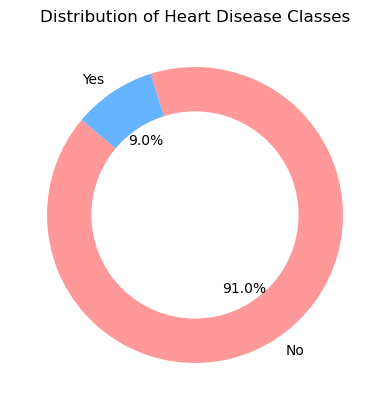

In [10]:
# Visualizing the heart disease data
heart_disease_counts = df['HeartDisease'].value_counts()


plt.figure(figsize=(4, 4))
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF9999','#66B3FF'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.title('Distribution of Heart Disease Classes')

plt.show()

MODEL CREATION

In [11]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [12]:
X['AgeCategory'] = X['AgeCategory'].str.extract('(\d+)').astype(int)

In [13]:
binary_cols = ['Smoking','AlcoholDrinking','Stroke','DiffWalking','Diabetic',
               'PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

for col in binary_cols:
    X[col] =LabelEncoder().fit_transform(X[col])

In [14]:
numerical_cols = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [15]:
categorical_columns = ['Sex', 'Race', 'GenHealth']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X = X_encoded

In [16]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,Sex_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,-1.830820,1,0,0,-0.070301,3.183766,0,55,2,1,...,0,0,0,0,0,1,0,0,0,1
1,-1.252600,0,0,1,-0.438823,-0.507054,0,80,0,1,...,0,0,0,0,0,1,0,0,0,1
2,-0.287869,1,0,0,2.017986,3.183766,0,65,2,1,...,1,0,0,0,0,1,1,0,0,0
3,-0.654281,0,0,0,-0.438823,-0.507054,0,75,0,0,...,0,0,0,0,0,1,0,1,0,0
4,-0.731583,0,0,0,3.000709,-0.507054,1,40,0,1,...,0,0,0,0,0,1,0,0,0,1


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [18]:
model_performance = {}

Logistic Regression

In [19]:
model_name = 'Logistic Regression'
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


Decision Tree

In [20]:
model_name = 'Decision Tree'
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

Random Forest

In [21]:
model_name = 'Random Forest'
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


Gradient Boosting

In [22]:
model_name = 'Gradient Boosting'
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

Neural Network

In [23]:
model_name = 'Neural Network'
model = MLPClassifier(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

Model Performance

In [24]:
for model_name, metrics in model_performance.items():
    print(f'Model: {model_name}')
    print(f'Accuracy: {metrics["Accuracy"]}')
    print(f'Precision: {metrics["Precision"]}')
    print(f'Recall: {metrics["Recall"]}')
    print(f'F1 Score: {metrics["F1 Score"]}')
    print('-' * 30)

Model: Logistic Regression
Accuracy: 0.91071191833488
Precision: 0.5279783393501805
Recall: 0.10733944954128441
F1 Score: 0.17840805123513268
------------------------------
Model: Decision Tree
Accuracy: 0.8542522868885059
Precision: 0.22432833360804352
Recall: 0.24972477064220183
F1 Score: 0.23634627073022485
------------------------------
Model: Random Forest
Accuracy: 0.8983328914225109
Precision: 0.3271075214538112
Recall: 0.11889908256880734
F1 Score: 0.17440452159870812
------------------------------
Model: Gradient Boosting
Accuracy: 0.9115239294710328
Precision: 0.5614617940199336
Recall: 0.09302752293577982
F1 Score: 0.15960963324413663
------------------------------
Model: Neural Network
Accuracy: 0.9109936364841575
Precision: 0.5749525616698292
Recall: 0.05559633027522936
F1 Score: 0.10138865651664715
------------------------------


In [25]:
results_dict = {}

In [27]:
# Define and train your models
decision_tree_model = DecisionTreeClassifier()
logistic_regression_model = LogisticRegression(max_iter=1000)
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier()
neural_network_model = MLPClassifier(max_iter=1000)

decision_tree_model.fit(X_train, y_train)
logistic_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
neural_network_model.fit(X_train, y_train)

# Define the evaluate_model function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred_test = model.predict(X_test)
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

    actual_counts = results_df['Actual'].value_counts()
    predicted_counts = results_df['Predicted'].value_counts()

    actual_table = pd.DataFrame(actual_counts)
    actual_table.columns = ['Counts']

    predicted_table = pd.DataFrame(predicted_counts)
    predicted_table.columns = ['Counts']

    merged_table = actual_table.merge(predicted_table, left_index=True, right_index=True, how='outer')
    merged_table.columns = ['Actual Counts', 'Predicted Counts']

    results_dict[model_name] = merged_table

# Store the models in a list
models = [decision_tree_model, logistic_regression_model, random_forest_model, gradient_boosting_model, neural_network_model]

# Define the model names
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']

# Evaluate the models
results_dict = {}

for model_name, model in zip(model_names, models):
    evaluate_model(model, X_test, y_test, model_name)

for model_name, results_table in results_dict.items():
    print(f"Model: {model_name}")
    print(results_table)
    print('-' * 50)

Model: Decision Tree
     Actual Counts  Predicted Counts
No           54894             54288
Yes           5450              6056
--------------------------------------------------
Model: Logistic Regression
     Actual Counts  Predicted Counts
No           54894             59236
Yes           5450              1108
--------------------------------------------------
Model: Random Forest
     Actual Counts  Predicted Counts
No           54894             58379
Yes           5450              1965
--------------------------------------------------
Model: Gradient Boosting
     Actual Counts  Predicted Counts
No           54894             59441
Yes           5450               903
--------------------------------------------------
Model: Neural Network
     Actual Counts  Predicted Counts
No           54894             59799
Yes           5450               545
--------------------------------------------------


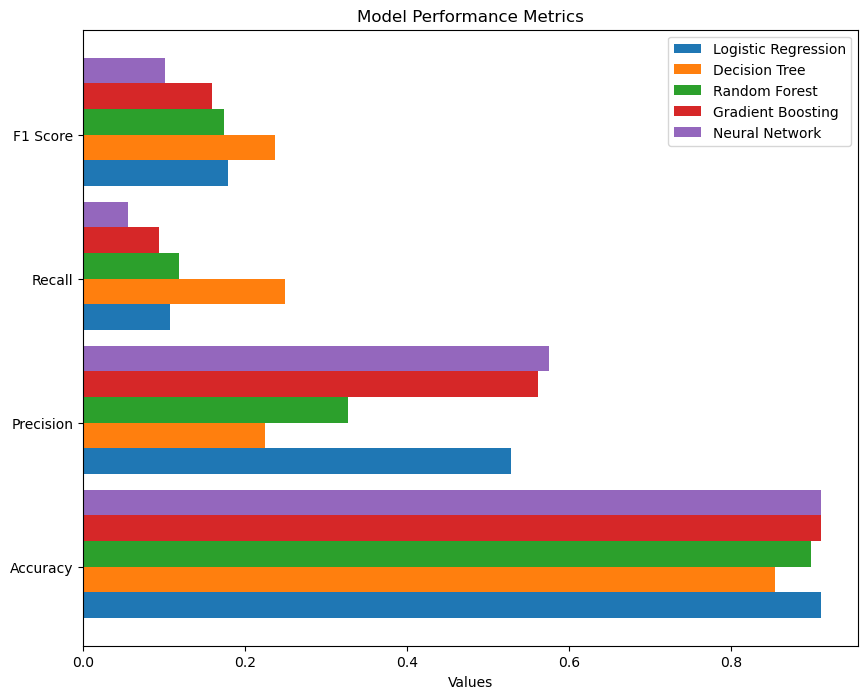

In [28]:
metrics = ['Accuracy', 'Precision','Recall','F1 Score']

# Get the list of model names
model_names = list(model_performance.keys())

fig, ax = plt.subplots(figsize=(10, 8))

num_metrics = len(metrics)
num_models = len(model_performance)
total_width = 0.8
width = total_width / num_models

pos = np.arange(num_metrics) * (total_width + 0.1)

for i, (model_name, metrics_dict) in enumerate(model_performance.items()):
    values = [metrics_dict[metric] for metric in metrics]

    plt.barh(pos + i * width, values, width, label=model_name)

ax.set_yticks(pos + ((num_metrics-1) / 2) * width)
ax.set_yticklabels(metrics)
ax.set_xlabel('Values')
ax.set_title('Model Performance Metrics')
plt.legend()

plt.show()

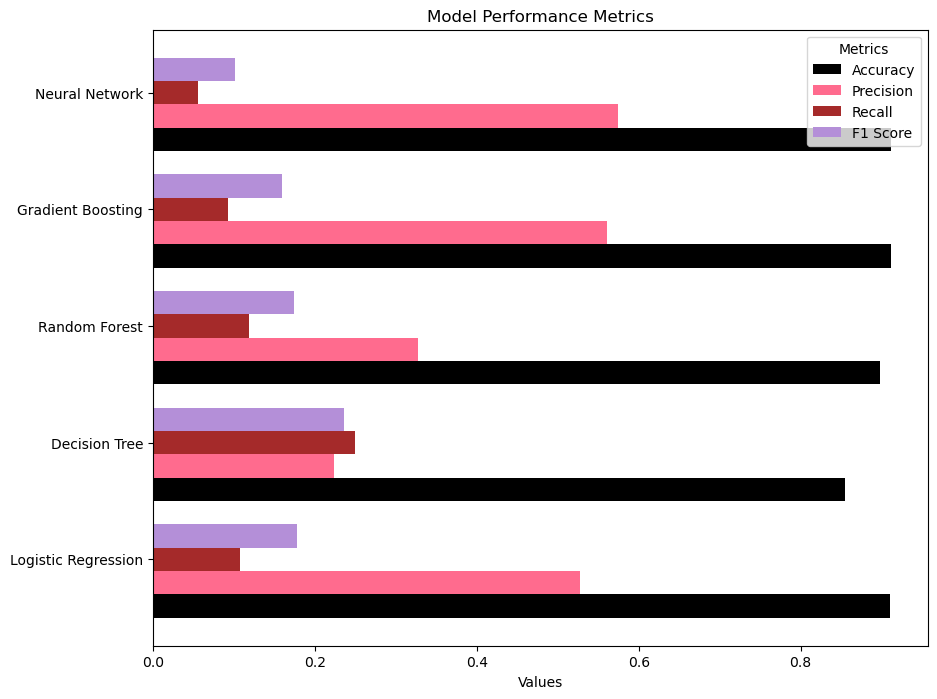

In [29]:
colors = ['#000000', '#FF6B8E', 'brown','#B48FD8']

fig, ax = plt.subplots(figsize=(10, 8))

pos = np.arange(len(model_names))
width = 0.2
for i, metric in enumerate(metrics):
    values = [model_performance[model_name][metric] for model_name in model_names]
    
    plt.barh(pos + i * width, values, width, label=metric, color=colors[i])

ax.set_yticks(pos + (len(metrics) / 2) * width)
ax.set_yticklabels(model_names)
ax.set_xlabel('Values')
ax.set_title('Model Performance Metrics')
plt.legend(title='Metrics', loc='upper right')

plt.show()

CONCLUSIONS:
    
Models are performing well based on accuracy

Very poor recall making the model unfit

Of the five models Decision Tree is the best across the 4 metrices

MODEL 2 WITH BALANCED DATA

In [30]:
file_path_2 = 'downloads/heart/heart_2020_cleaned.csv'
df_clean = pd.read_csv(file_path_2)

In [31]:
row_duplicate_counts = df[df.duplicated].shape[0]
print(row_duplicate_counts)

0


In [32]:
bmi_proportions = df_clean['BMI'].value_counts()
print(bmi_proportions)

26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: BMI, Length: 3604, dtype: int64


In [33]:
#Get the counts of each 'BMI' value
bmi_proportions = df_clean['BMI'].value_counts()

#Identify values with counts less than 100
values_to_drop = bmi_proportions[bmi_proportions < 100].index

#Drop rows with those values
df_clean = df_clean[~df_clean['BMI'].isin(values_to_drop)]

In [34]:
smoking_proportions = df_clean['Smoking'].value_counts()
print(smoking_proportions)

No     159697
Yes    110959
Name: Smoking, dtype: int64


In [35]:
Alcohol_drinking_proportions = df_clean['AlcoholDrinking'].value_counts()
print(Alcohol_drinking_proportions)

No     251678
Yes     18978
Name: AlcoholDrinking, dtype: int64


In [36]:
# Proportions show that stroke is not a very good contributing factor,regardless it will be kept in this project
Stroke_proportions = df_clean['Stroke'].value_counts()
print(Stroke_proportions)

No     260942
Yes      9714
Name: Stroke, dtype: int64


In [37]:
# Dropping values for proportions with < 100 people
physical_health_proportions = df_clean['PhysicalHealth'].value_counts()
values_to_drop = physical_health_proportions[physical_health_proportions < 100].index
df_clean = df_clean[~df_clean['PhysicalHealth'].isin(values_to_drop)]

In [38]:
# Dropping values for proportions with less than 100 people
mental_health_proportions = df_clean['MentalHealth'].value_counts()
values_to_drop = mental_health_proportions[mental_health_proportions < 100].index
df_clean = df_clean[~df_clean['MentalHealth'].isin(values_to_drop)]

In [39]:
DiffWalking_proportions = df_clean['DiffWalking'].value_counts()
print(DiffWalking_proportions)

No     236544
Yes     33017
Name: DiffWalking, dtype: int64


In [40]:
Sex_proportions = df_clean['Sex'].value_counts()
print(Sex_proportions)

Female    139635
Male      129926
Name: Sex, dtype: int64


In [41]:
# One of the best evenly distributed columns
AgeCategory_proportions = df_clean['AgeCategory'].value_counts()
print(AgeCategory_proportions)

65-69          28541
60-64          28196
70-74          26129
55-59          25019
50-54          21247
80 or older    20289
45-49          18367
75-79          18000
18-24          17957
40-44          17847
35-39          17478
30-34          15922
25-29          14569
Name: AgeCategory, dtype: int64


In [42]:
Race_proportions = df_clean['Race'].value_counts()
print(Race_proportions)

White                             209607
Hispanic                           22111
Black                              17912
Other                               8951
Asian                               6743
American Indian/Alaskan Native      4237
Name: Race, dtype: int64


In [43]:
# Define the races to keep
races_to_keep = ['White', 'Black','Hispanic']

# Replace all the other races with white
df_clean['Race'] = df_clean['Race'].apply(lambda x: x if x in races_to_keep else 'White')

Race_proportions = df_clean['Race'].value_counts()
print(Race_proportions)

White       229538
Hispanic     22111
Black        17912
Name: Race, dtype: int64


In [44]:
Diabetic_proportions = df_clean['Diabetic'].value_counts()
print(Diabetic_proportions)

No                         231060
Yes                         31073
No, borderline diabetes      5301
Yes (during pregnancy)       2127
Name: Diabetic, dtype: int64


In [45]:
# Replace 'No, borderline diabetes' with 'No'
df_clean['Diabetic'].replace('No, borderline diabetes', 'No', inplace=True)

# Drop rows where 'Diabetic' is 'Yes (during pregnancy)'
df_clean = df_clean[df_clean['Diabetic'] != 'Yes (during pregnancy)']

In [46]:
PhysicalActivity_proportions = df_clean['PhysicalActivity'].value_counts()
print(PhysicalActivity_proportions)

Yes    211039
No      56395
Name: PhysicalActivity, dtype: int64


In [47]:
GenHealth_proportions = df_clean['GenHealth'].value_counts()
print(GenHealth_proportions)

Very good    98553
Good         76222
Excellent    58328
Fair         26221
Poor          8110
Name: GenHealth, dtype: int64


In [48]:
SleepTime_proportions = df_clean['SleepTime'].value_counts()
print(SleepTime_proportions)


7     83497
8     82845
6     55002
5     15173
9     13306
10     6309
4      5979
12     1694
3      1504
2       620
1       448
11      325
16      180
14      178
15      136
18       79
13       64
20       50
24       20
17       13
22        8
19        2
23        2
Name: SleepTime, dtype: int64


In [49]:
threshold = 100

# Get the sleep times with less than 100 people and drop!
sleep_times_to_drop = SleepTime_proportions[SleepTime_proportions < threshold].index
df_clean = df_clean[~df_clean['SleepTime'].isin(sleep_times_to_drop)]

SleepTime_proportions = df_clean['SleepTime'].value_counts()
print(SleepTime_proportions)

7     83497
8     82845
6     55002
5     15173
9     13306
10     6309
4      5979
12     1694
3      1504
2       620
1       448
11      325
16      180
14      178
15      136
Name: SleepTime, dtype: int64


In [50]:
Asthma_proportions = df_clean['Asthma'].value_counts()
print(Asthma_proportions)

No     233331
Yes     33865
Name: Asthma, dtype: int64


In [51]:
#The weight of proportions with yes in kidney disease is very small
KidneyDisease_proportions = df_clean['KidneyDisease'].value_counts()
print(KidneyDisease_proportions)

No     258135
Yes      9061
Name: KidneyDisease, dtype: int64


In [52]:
# Tuning the whole column to no for kidney disease
df_clean['KidneyDisease'] = 'No'
KidneyDisease_proportions = df_clean['KidneyDisease'].value_counts()
print(KidneyDisease_proportions)

No    267196
Name: KidneyDisease, dtype: int64


In [53]:
# Tuning entire skincancer column to no
df_clean['SkinCancer'] = 'No'
SkinCancer_proportions = df_clean['SkinCancer'].value_counts()
print(SkinCancer_proportions)

No    267196
Name: SkinCancer, dtype: int64


In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267196 entries, 1 to 319792
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      267196 non-null  object 
 1   BMI               267196 non-null  float64
 2   Smoking           267196 non-null  object 
 3   AlcoholDrinking   267196 non-null  object 
 4   Stroke            267196 non-null  object 
 5   PhysicalHealth    267196 non-null  int64  
 6   MentalHealth      267196 non-null  int64  
 7   DiffWalking       267196 non-null  object 
 8   Sex               267196 non-null  object 
 9   AgeCategory       267196 non-null  object 
 10  Race              267196 non-null  object 
 11  Diabetic          267196 non-null  object 
 12  PhysicalActivity  267196 non-null  object 
 13  GenHealth         267196 non-null  object 
 14  SleepTime         267196 non-null  int64  
 15  Asthma            267196 non-null  object 
 16  KidneyDisease     26

MODEL 2 

In [55]:
X = df_clean.drop(columns=['HeartDisease'])
y = df_clean['HeartDisease']

In [56]:
X['AgeCategory'] = X['AgeCategory'].str.extract('(\d+)').astype(int)

In [57]:
binary_cols = ['Smoking','AlcoholDrinking','Stroke','DiffWalking','Diabetic',
               'PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

for col in binary_cols:
    X[col] =LabelEncoder().fit_transform(X[col])

In [58]:
numerical_cols = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [59]:
categorical_columns = ['Sex', 'Race', 'GenHealth']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X = X_encoded

In [60]:
X.tail()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,Asthma,KidneyDisease,SkinCancer,Sex_Male,Race_Hispanic,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
319788,-0.855859,0,0,0,-0.402675,-0.477814,0,60,0,1,...,0,0,0,0,1,0,0,0,0,0
319789,-1.085094,0,0,0,-0.402675,-0.477814,0,18,0,1,...,0,0,0,0,1,0,0,0,0,0
319790,-0.059465,1,0,0,0.521211,-0.477814,1,60,1,0,...,1,0,0,1,1,0,1,0,0,0
319791,0.420743,1,0,0,-0.402675,-0.477814,0,35,0,1,...,1,0,0,1,1,0,0,0,0,1
319792,-0.685909,0,0,0,-0.402675,-0.477814,0,45,0,1,...,0,0,0,0,1,0,0,1,0,0


In [61]:
X = X.astype('float32')

In [62]:
num_rows = len(df_clean)
print(num_rows)

267196


In [63]:
heart_disease_proportions = df_clean['HeartDisease'].value_counts()
print(heart_disease_proportions)

No     245506
Yes     21690
Name: HeartDisease, dtype: int64


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [65]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling to the training set
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [66]:
# Convert y_train_resampled to a pandas Series (if it's not already)
y_train_resampled_series = pd.Series(y_train_resampled)

# Count the proportions of 'Yes' and 'No'
proportions = y_train_resampled_series.value_counts()

# Print the proportions
print(proportions)

No     17364
Yes    17364
Name: HeartDisease, dtype: int64


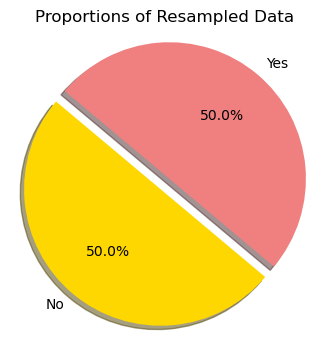

In [67]:
import matplotlib.pyplot as plt

labels = proportions.index
sizes = proportions.values

colors = ['gold', 'lightcoral']

explode = (0.1, 0) 

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Proportions of Resampled Data")

plt.show()

In [ ]:
# Selected decision tree and logistic regression(most best performing so far)

In [68]:
model_performance = {}

In [69]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled data
decision_tree_model.fit(X_train_resampled, y_train_resampled)

# Predict using the test set
y_pred = decision_tree_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Store the performance metrics in a dictionary
model_performance['Decision Tree'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


In [70]:
# Method 1 of visualizing metrics!
# The imbalance is still there(as shown by weighed avg)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.96      0.68      0.79     49114
         Yes       0.15      0.67      0.25      4326

    accuracy                           0.67     53440
   macro avg       0.56      0.67      0.52     53440
weighted avg       0.89      0.67      0.75     53440



In [71]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Store performance metrics in the model_performance dictionary
model_performance['Logistic Regression'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [72]:
for model_name, metrics in model_performance.items():
    print(f'Model: {model_name}')
    print(f'Accuracy: {metrics["Accuracy"]}')
    print(f'Precision: {metrics["Precision"]}')
    print(f'Recall: {metrics["Recall"]}')
    print(f'F1 Score: {metrics["F1 Score"]}')
    print('-' * 30)

Model: Decision Tree
Accuracy: 0.6742514970059881
Precision: 0.152776303216902
Recall: 0.6652797041146555
F1 Score: 0.24848903470903125
------------------------------
Model: Logistic Regression
Accuracy: 0.7469498502994012
Precision: 0.2132925992892325
Recall: 0.7907998150716598
F1 Score: 0.3359685735330224
------------------------------


CONCLUSION

Both versions of the model need improvement

A good F1 score is what is mostly needed since this is a medical model

THE END:)